In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
img_array = cv2.imread("dataset/with_mask/0-with-mask.jpg")

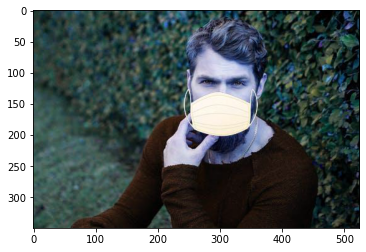

In [3]:
plt.imshow(img_array)

In [4]:
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

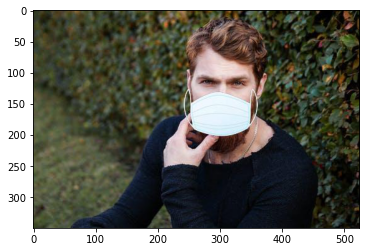

In [5]:
plt.imshow(img_array)

In [6]:
img_array.shape

(350, 525, 3)

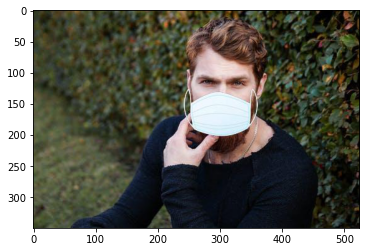

In [7]:
DataDirectory = "dataset/"
Classes = ["with_mask","without_mask"]
for category in Classes:
    path=os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

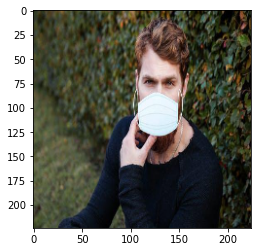

In [8]:
img_size = 224     ## ImageNet = 224x224
new_array=cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Reading all images and converting into array

In [14]:
tranning_Data = []

def create_tranning_Data():
    for category in Classes:
        path=os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (img_size, img_size))
                tranning_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [15]:
create_tranning_Data()

In [16]:
print(len(tranning_Data))

1378


In [17]:
import random
random.shuffle(tranning_Data)

In [18]:
X=[]       # data features
y=[]       # label

for features,label in tranning_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1, img_size, img_size, 3)    

In [19]:
X.shape

(1378, 224, 224, 3)

In [20]:
# normalise the data
X=X/255.0

In [16]:
Y=np.array(y)

In [17]:
import pickle

pickle_out=open("X_pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("Y_pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()